In [1]:
# 导入 pandas 读取数据
import pandas as pd
import numpy as np

# 读取数据
data = pd.read_csv("./data/peach_spectra_brix.csv")
data[:5]

,Brix,wl1,wl2,wl3,wl4,wl5,wl6,wl7,wl8,wl9,...,wl591,wl592,wl593,wl594,wl595,wl596,wl597,wl598,wl599,wl600
0,15.5,-1.032355,-1.030551,-1.027970,-1.024937,-1.021866,-1.019143,-1.016866,-1.014910,-1.012907,...,0.692447,0.692944,0.692376,0.690764,0.688081,0.684294,0.679348,0.673240,0.665922,0.657307
1,16.7,-1.139034,-1.137186,-1.134485,-1.131222,-1.127761,-1.124464,-1.121508,-1.118802,-1.115973,...,0.729328,0.728031,0.725548,0.721815,0.716767,0.710405,0.702706,0.693710,0.683480,0.671960
2,18.1,-1.152821,-1.150937,-1.148288,-1.145165,-1.141951,-1.138977,-1.136366,-1.134011,-1.131516,...,0.736608,0.735214,0.732669,0.728911,0.723844,0.717415,0.709645,0.700555,0.690147,0.678390
3,14.8,-1.087215,-1.085455,-1.082867,-1.079797,-1.076568,-1.073632,-1.071087,-1.068877,-1.066654,...,0.758695,0.757963,0.756038,0.752903,0.748496,0.742886,0.736085,0.728019,0.718577,0.707702
4,15.1,-1.080364,-1.078436,-1.075784,-1.072693,-1.069562,-1.066691,-1.064214,-1.062025,-1.059787,...,0.719793,0.718875,0.716860,0.713771,0.709577,0.704232,0.697717,0.689882,0.680748,0.670263


In [2]:
# m * n 
print("数据矩阵 data.shape：",data.shape)

# 50个样本， 600个 波段 第一列是 桃子糖度值 需要分离开
X = data.values[:,1:] 
# 等同操作
#X = data.drop(['Brix'], axis=1)

y = data.values[:,0]
# 等同操作
# y = data.loc[:,'Brix'].values

print(f"X.shape:{X.shape}, y.shape:{y.shape}")
X,y

数据矩阵 data.shape： (50, 601)
X.shape:(50, 600), y.shape:(50,)


(array([[-1.03235522, -1.03055086, -1.02796982, ...,  0.67323981,
          0.66592221,  0.65730671],
        [-1.13903374, -1.13718559, -1.13448514, ...,  0.69371003,
          0.6834796 ,  0.67195954],
        [-1.15282145, -1.15093731, -1.14828792, ...,  0.7005548 ,
          0.69014711,  0.67839039],
        ...,
        [-1.07507228, -1.07321983, -1.07053089, ...,  0.68964632,
          0.68117942,  0.6714216 ],
        [-1.13547094, -1.13363607, -1.13100228, ...,  0.70733553,
          0.69798395,  0.68729054],
        [-1.03606157, -1.03425973, -1.03167827, ...,  0.66929315,
          0.66099829,  0.65157825]]),
 array([15.5, 16.7, 18.1, 14.8, 15.1, 19.3, 12.5, 17.7, 18.5, 18.3, 18.6,
        17.2, 19.4, 16.2, 15.3, 14.3, 13.3, 14.8, 18.5, 11.2, 16.3, 17.5,
        16.4, 18.1, 17.5, 16.7, 20. , 14.5, 13. , 11.3, 16.8, 17.2, 15.4,
        13.5, 19.2, 15.4, 15.8, 18. , 18.2, 12.3, 15.5, 14.8, 19.1, 17.9,
        16.8, 18.1, 16.6, 18.8, 17.7, 18.1]))

In [3]:
# 导入SPA包
import SPA 

SPA

<module 'SPA' from '/home/rxc/study/SPA/SPA.py'>

In [4]:
# 导入spa对象
spa = SPA.SPA()
# 数据归一化
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))  # 这里feature_range根据需要自行设置，默认（0,1）

X_ = min_max_scaler.fit_transform(X)

print(X[1,:5])
print(X_[1,:5])

[-1.13903374 -1.13718559 -1.13448514 -1.13122205 -1.12776107]
[-0.60169236 -0.60165083 -0.60179295 -0.60222359 -0.60283253]


In [5]:
# 建模集测试集分割
from sklearn.model_selection import train_test_split

# 注意 X_ 分割 
# 若存在 运行后出现 波段选择为 最小值 可适当调整 建模集与测试集比例 test_size 值 0.3 - 0.5
Xcal, Xval, ycal, yval = train_test_split(X_, y, test_size=0.4, random_state=0)

Xcal.shape,Xval.shape

((30, 600), (20, 600))

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


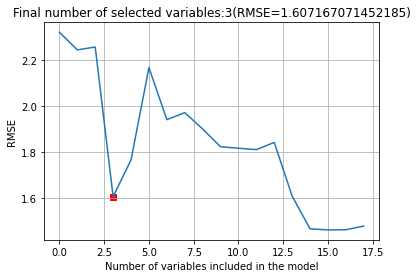

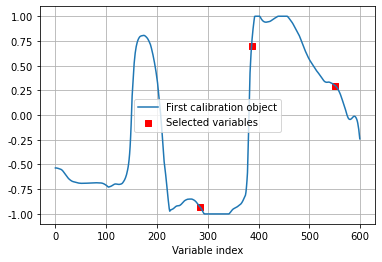

In [6]:
# 建模筛选
# m_max 默认为 50(Xcal样本大于52) ,如果 Xcal(m*n) m < 50 m_max=m-2
var_sel, var_sel_phase2 = spa.spa(
        Xcal, ycal, m_min=2, m_max=28,Xval=Xval, yval=yval, autoscaling=1)

(35, 600) (15, 600)


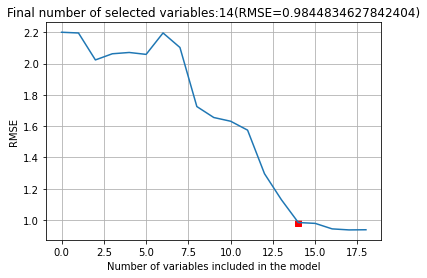

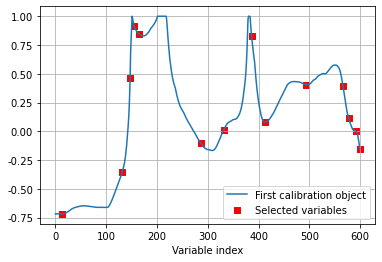

In [7]:
Xcal, Xval, ycal, yval = train_test_split(X_, y, test_size=0.3, random_state=0)
print(Xcal.shape,Xval.shape)
# 建模筛选
var_sel, var_sel_phase2 = spa.spa(
        Xcal, ycal, m_min=2, m_max=33,Xval=Xval, yval=yval, autoscaling=1)

In [8]:
Xcal, Xval, ycal, yval = train_test_split(X_, y, test_size=0.5, random_state=0)
print(Xcal.shape,Xval.shape)
# 建模筛选
var_sel, var_sel_phase2 = spa.spa(
        Xcal, ycal, m_min=2, m_max=23,Xval=Xval, yval=yval, autoscaling=1)

In [9]:
# 导出 筛选光谱波段
# spa 返回的是 列号 并不是光谱数据
# 获取 波段列表
absorbances = data.columns.values[1:]
print("波段(前5个)",absorbances[:5])

# spa 筛选出的波段  以 test_size=0.3 为例
print("spa 筛选出的波段(以 test_size=0.3 为例):",absorbances[var_sel])

# 导出 筛选波段光谱数据
X_select = X[:,var_sel]
print("X_select.shape:",X_select.shape)

波段(前5个) ['wl1' 'wl2' 'wl3' 'wl4' 'wl5']
spa 筛选出的波段(以 test_size=0.3 为例): ['wl592' 'wl287' 'wl156' 'wl166' 'wl387' 'wl13' 'wl413' 'wl578' 'wl148'
 'wl600' 'wl133' 'wl495' 'wl332' 'wl567']
X_select.shape: (50, 14)


In [10]:
# 建模 比较 PLS
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from scipy.signal import savgol_filter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression

In [47]:
def run_model(X, y):

    train_accuracy = []
    test_accuracy = []
    best_train_accuracy = []
    best_test_accuracy = []
    sf = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
    for i in range(2,(int)(X.shape[0] * 0.8)):
        for train_index, test_index in sf.split(X):
            X_train,y_train = np.array(X)[train_index,:], np.array(y)[train_index]
            X_test,y_test = np.array(X)[test_index,:], np.array(y)[test_index]
            pls = PLSRegression(n_components=i)
            pls.fit(X_train, y_train)
            y_train_pre = pls.predict(X_train).reshape(1,-1)[0]
            y_test_pre = pls.predict(X_test).reshape(1,-1)[0]
            
            train_accuracy.append(explained_variance_score(y_train, y_train_pre))
            test_accuracy.append(explained_variance_score(y_test, y_test_pre))
        best_test_accuracy.append(np.mean(test_accuracy))
        best_train_accuracy.append(np.mean(train_accuracy))
    try:
        beat_pamas = np.argmax(best_train_accuracy)
        print(beat_pamas)
    except:
        return 0,0,0,0

    return best_test_accuracy[beat_pamas], best_train_accuracy[beat_pamas]


In [48]:
run_model(X, y)

37


(-0.24995622106481558, 0.875900748295627)

In [50]:
run_model(X_select, y)
#(0.40504202820663965, 0.7187061376599163)